In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_absolute_error
from scipy.stats import skew, kurtosis

### Reading and Understanding data

In [2]:
df = pd.read_csv('WineQT.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [5]:
df.shape

(1143, 13)

In [6]:
del df['Id']

### Processing Data

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [8]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


In [10]:
statistic_df = df.describe().loc[['mean', 'std']]

# Calculate skewness and kurtosis
skewness = df.skew(numeric_only=None)
kurt = df.kurtosis(numeric_only=None)

# Add skewness and kurtosis to the stats DataFrame
statistic_df.loc['skewness'] = skewness
statistic_df.loc['kurtosis'] = kurt

# Transpose the DataFrame for better readability
statistic_df = statistic_df.T
columns = {'mean':'Mean', 'std' : 'Standard Deviation', 'skewness' : 'Skewness', 'kurtosis': 'Kurtosis'}
statistic_df = statistic_df.rename(columns = columns)
# Display the table
statistic_df

,Mean,Standard Deviation,Skewness,Kurtosis
fixed acidity,8.311111,1.747595,1.044930,1.384614
volatile acidity,0.531339,0.179633,0.681547,1.375531
citric acid,0.268364,0.196686,0.371561,-0.714686
residual sugar,2.532152,1.355917,4.361096,27.675366
chlorides,0.086933,0.047267,6.026360,47.078324
free sulfur dioxide,15.615486,10.250486,1.231261,1.932170
total sulfur dioxide,45.914698,32.782130,1.665766,5.098748
density,0.996730,0.001925,0.102395,0.888123
pH,3.311015,0.156664,0.221138,0.925791
sulphates,0.657708,0.170399,2.497266,12.017377


### Categorical Analysis

In [11]:
def plot_quality_distribution(df):
    """
    Plot the distribution of wines by quality category.

    Args:
    df (DataFrame): DataFrame containing wine data with a 'quality' column.

    Returns:
    None
    """
    # Define categories for 'quality'
    def quality_category(quality):
        if quality <= 4:
            return 'Low'
        elif quality <= 7:
            return 'Medium'
        else:
            return 'High'

    # Apply the quality_category function to create a new column 'quality_category'
    df['quality_category'] = df['quality'].apply(quality_category)

    # Count the number of wines in each quality category
    quality_counts = df['quality_category'].value_counts()

    # Define colors for each quality category
    colors = ['orange', 'yellow', 'brown']

    # Plot the categorical graph with different colors for each category
    quality_counts.plot(kind='bar', color=colors, edgecolor='black')

    # Add labels and title
    plt.xlabel('Quality Category')
    plt.ylabel('Number of Wines')
    plt.title('Distribution of Wines by Quality Category')

    # Show the plot
    plt.savefig('barplot', dpi=300)
    plt.show()


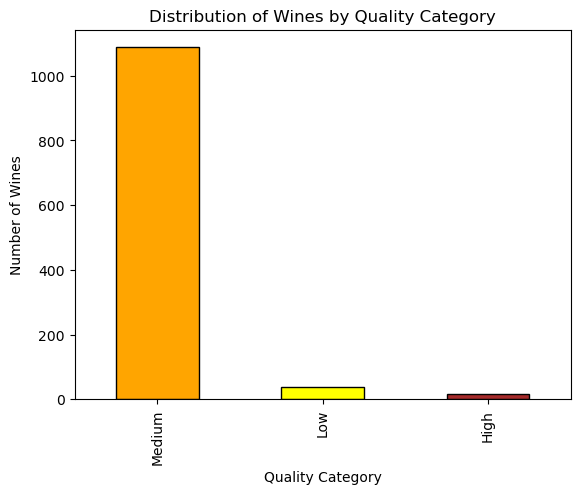

In [12]:
plot_quality_distribution(df)

### Correlation Matrix

In [13]:
def visualize_heatmap(dataframe):
    """
    Visualize the correlation matrix of a DataFrame using a heatmap.

    Parameters:
    dataframe (DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    plt.figure(figsize=(10, 5))
    sns.heatmap(dataframe.corr(), annot=True, cmap='RdBu')
    plt.title("Correlation Matrix Heatmap")
    plt.savefig('heatmap', dpi = 300)
    plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1084\970155500.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(), annot=True, cmap='RdBu')


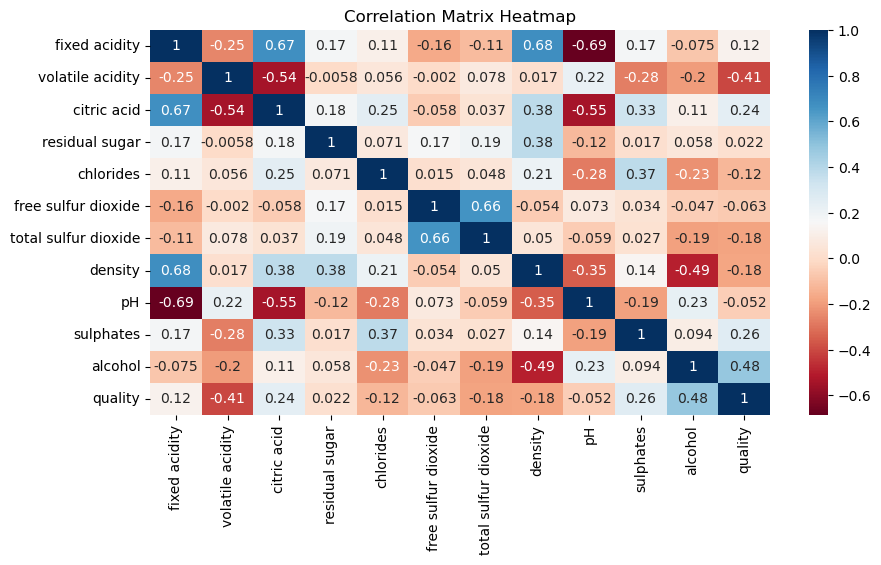

In [14]:
visualize_heatmap(df)

## Fitting

In [15]:
def fit_regression(data, independent_var, dependent_var, test_size=0.2):
    """
    This function fits a linear regression model to analyze the relationship
    between a dependent variable and an independent variable with train-test split.

    Args:
    - data (DataFrame): The dataset containing the variables.
    - independent_var (str): The name of the independent variable.
    - dependent_var (str): The name of the dependent variable.
    - test_size (float): The proportion of the dataset to include in the test split.

    Returns:
    - model (LinearRegression): Fitted linear regression model.
    - X_test (DataFrame): Independent variable values for the test data.
    - y_test (Series): Actual test values of the dependent variable.
    """

    # Split the dataset into training and testing sets
    X = data[independent_var]
    y = data[dependent_var]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
#     # Reshape X_train and X_test to 2D arrays
    X_train = X_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    return model, X_test, y_test


In [16]:
independent_var = 'alcohol' 
dependent_var = 'quality'  

# Fit linear regression model with train-test split for alchohol and quality
model, X_test, y_test = fit_regression(df,independent_var, dependent_var)

# Evaluate model performance
predictions = model.predict(X_test)

In [17]:
confidence = 0.95
n = len(X_test)
mean_x = np.mean(X_test)
t_value = 2.262  # for 95% confidence interval with n-2 degrees of freedom
se = np.sqrt(np.sum((y_test - predictions)**2) / (n - 2))
margin_of_error = t_value * se
lower_bound = predictions - margin_of_error
upper_bound = predictions + margin_of_error

In [18]:
def plot_results(X_test, y_test, predictions, margin_of_error):
    """
    Visualize the results of a regression model, displaying actual versus predicted values with confidence intervals.

    Args:
        X_test (array-like): Feature values used for testing.
        y_test (array-like): Actual target values for testing.
        predictions (array-like): Predicted target values.
        margin_of_error (array-like): Margin of error for each prediction.

    Returns:
        None
    """
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual Quality', marker='o')
    plt.plot(X_test, predictions, color='green', label='Predicted Quality', marker='x')
    plt.errorbar(X_test, predictions, yerr=margin_of_error, fmt='o', color='red', label='95% Confidence Intervals', capsize=4, elinewidth=0.5, capthick=0.5)
    plt.xlabel('Alcohol')
    plt.ylabel('Quality')
    plt.title('Fitted Regression Line with Error Bars')
    plt.legend()
    plt.grid(True)
    plt.savefig('fitting', dpi = 300)
    plt.show()


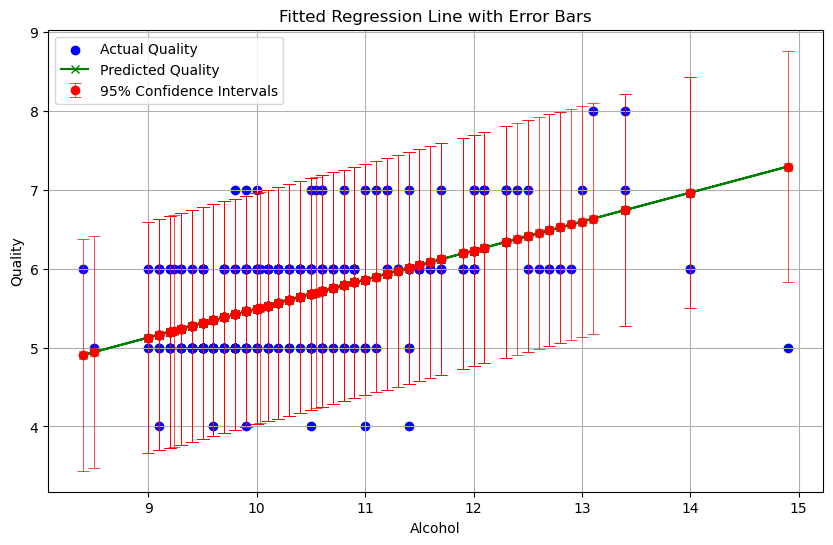

In [20]:
plot_results(X_test, y_test, predictions, margin_of_error)

In [21]:
mae = mean_absolute_error(y_test, predictions)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.5265421044902157


In [22]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.6461790756421737


## Clustering

In [23]:
import warnings 
warnings.filterwarnings("ignore")

In [24]:
def remove_outliers(df):
    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    # Calculate the interquartile range (IQR) for each column
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out rows where any column value is outside the bounds
    df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    
    return df_filtered

In [25]:
df = remove_outliers(df)

In [26]:
def boxplot(dataframe):
    """
    Check for outliers in the numerical data of a DataFrame using a boxplot.

    Parameters:
    dataframe (DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=dataframe)
    plt.title("Boxplot of all the numerical values")
    plt.xlabel("Columns")
    plt.ylabel("Values")
    plt.xticks(rotation=90)
    plt.savefig('boxplot', dpi=300)
    plt.show()

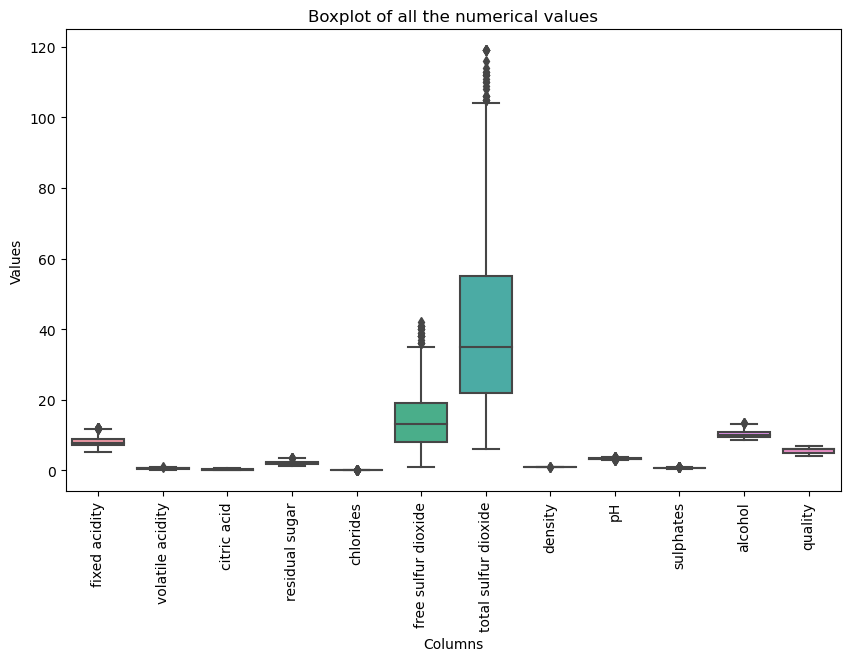

In [27]:
boxplot(df)

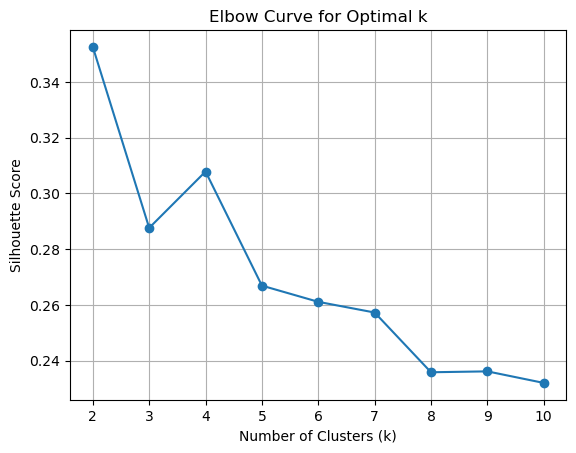

Optimal number of clusters (k) based on silhouette score: 2


In [28]:
selected_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 
                      'pH']

# Extracting the selected columns from the wine data
data = df[selected_columns]

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Use the silhouette score to find the optimal number of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, clusters))

# Plot the silhouette scores for different values of k
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Elbow Curve for Optimal k')
plt.xticks(range(2, 11))
plt.grid(True)
plt.savefig('elbow curve', dpi=300) 
plt.show()

# Based on the silhouette curve, choose the optimal number of clusters
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 to account for starting at 2 clusters
print("Optimal number of clusters (k) based on silhouette score:", optimal_k)

In [29]:
def clustering(data, num_clusters):
    """
    Apply K-means Clustering to the given data.

    Args:
    - data (array-like): Input data for clustering.
    - num_clusters (int): Number of clusters to form.

    Returns:
    - clusters (array): Cluster labels for each data point.
    - cluster_centers (array): Cluster centers in the original feature space.
    """
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    # Apply K-means Clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    
    # Get cluster centers
    cluster_centers = kmeans.cluster_centers_
    
    # Inverse transform cluster centers to original feature space
    cluster_centers = scaler.inverse_transform(cluster_centers)
    
    return clusters, cluster_centers


In [30]:
def plot_cluster(data, clusters, cluster_centers, kmeans):
    """
    Visualize the clusters along with predicted points.

    Parameters:
    - data (array-like): The original data.
    - clusters (array): Array of cluster labels for each data point.
    - cluster_centers (array): Array of cluster centers in the original feature space.
    - kmeans: Fitted KMeans model.
    """
    import numpy as np
    import matplotlib.pyplot as plt

    # Define colors for each cluster
    colors = ['red', 'gray', 'orange', 'yellow', 'blue']
    
    # Visualize original data points
    plt.figure(figsize=(10, 6))
    for cluster in np.unique(clusters):
        cluster_data = data[clusters == cluster]
        plt.scatter(cluster_data[:, 1], cluster_data[:, 0], label=f'Cluster {cluster+1}', alpha=0.7, color=colors[cluster])
    plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], marker='o', color='black', label='Cluster Centers')
    
    # Predict and visualize additional points
    for center in cluster_centers:
        # Generate multiple random points around each cluster center
        for _ in range(5):
            random_index = np.random.randint(len(data))
            random_point = data[random_index] + np.random.randn(1, data.shape[1]) * 0.1
            cluster_label = kmeans.predict(random_point)[0]
            plt.scatter(random_point[:, 1], random_point[:, 0], marker='x', color='yellow')
    
    plt.xlabel('Fixed Acidity')
    plt.ylabel('Volatile Acidity')
    plt.title('Clusters with Predicted Points')
    plt.legend()
    plt.grid(True)
    plt.savefig('cluster', dpi=300)
    plt.show()


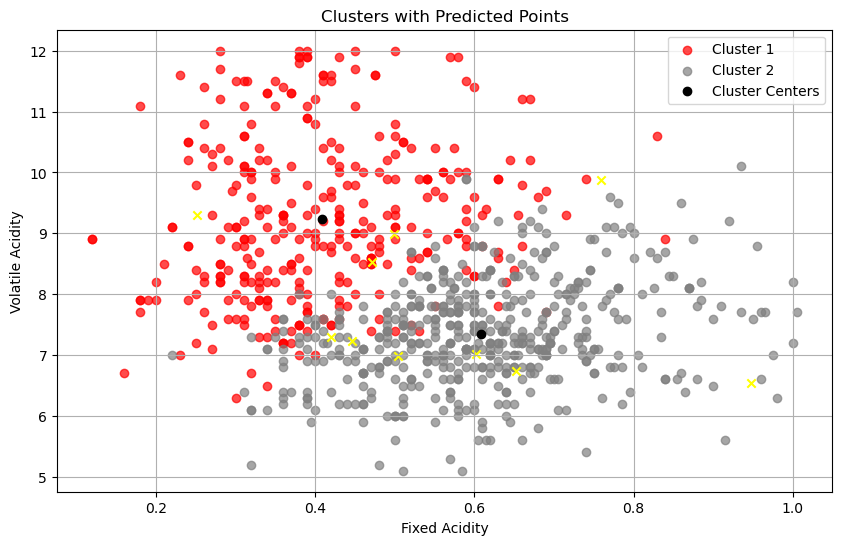

In [31]:
clusters, cluster_centers = clustering(data, optimal_k)
plot_cluster(data.values, clusters, cluster_centers, kmeans)

In [32]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, clusters)
print("Quality Score:", silhouette_avg)

Quality Score: 0.35256685114168274
